In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"D:\DM\Predictive maintenance\ai4i2020.csv")

In [4]:
df_sample = df.sample(n=500, random_state=42).reset_index(drop=True)


In [5]:
# Add missing value in numberic cols
missing_cols = ['Air temperature [K]', 'Torque [Nm]']
for col in missing_cols:
    idx_missing = df_sample.sample(frac=0.05, random_state=42).index
    df_sample.loc[idx_missing, col] = np.nan

In [6]:
# Chọn 5 dòng ngẫu nhiên để thêm outliers
outlier_idx = df_sample.sample(5, random_state=42).index

# Air temperature tăng gấp 3 lần max
df_sample.loc[outlier_idx, 'Air temperature [K]'] = df_sample['Air temperature [K]'].max() * 3

# Torque giảm xuống 1/5 min
df_sample.loc[outlier_idx, 'Torque [Nm]'] = df_sample['Torque [Nm]'].min() / 5


In [ ]:
# Thêm lỗi cột Type
cat_error_idx = df_sample.sample(5, random_state=1).index
df_sample.loc[cat_error_idx, 'Type'] = ['h', 'm', 'L ', '??', 'HIGH']


In [2]:
# Lưu file
df_sample.to_csv("dirty_sample_500.csv", index=False)



NameError: name 'df_sample' is not defined

In [9]:
df1 = pd.read_csv('dirty_sample_500.csv')

In [10]:
df1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,6253,L53432,L,300.8,310.3,1538,36.1,198,0,0,0,0,0,0
1,4685,M19544,M,303.6,311.8,1421,44.8,101,1,0,0,0,0,0
2,1732,M16591,M,298.3,307.9,1485,42.0,117,0,0,0,0,0,0
3,4743,L51922,L,303.3,311.3,1592,33.7,14,0,0,0,0,0,0
4,4522,L51701,L,302.4,310.4,1865,23.9,129,0,0,0,0,0,0


In [11]:
df1.isnull().sum()


UDI                         0
Product ID                  0
Type                        0
Air temperature [K]        20
Process temperature [K]     0
Rotational speed [rpm]      0
Torque [Nm]                20
Tool wear [min]             0
Machine failure             0
TWF                         0
HDF                         0
PWF                         0
OSF                         0
RNF                         0
dtype: int64

In [ ]:
df1.columns()

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [14]:
df1.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,500.000000,480.000000,500.000000,500.000000,480.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,4974.786000,306.408542,310.094200,1529.862000,39.969583,105.394000,0.034000,0.008000,0.012000,0.008000,0.006000,0.0
std,2871.641071,62.289239,1.430048,159.219146,10.094236,64.966515,0.181411,0.089173,0.108994,0.089173,0.077304,0.0
min,4.000000,295.500000,306.200000,1251.000000,2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2605.750000,298.500000,308.900000,1433.000000,34.175000,47.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,5076.000000,300.100000,310.100000,1495.000000,40.450000,103.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,7513.500000,301.600000,311.200000,1593.000000,47.025000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,9931.000000,912.600000,313.500000,2549.000000,68.600000,231.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [15]:
print(df_sample[['Air temperature [K]', 'Torque [Nm]']].describe())

       Air temperature [K]  Torque [Nm]
count           480.000000   480.000000
mean            306.408542    39.969583
std              62.289239    10.094236
min             295.500000     2.600000
25%             298.500000    34.175000
50%             300.100000    40.450000
75%             301.600000    47.025000
max             912.600000    68.600000


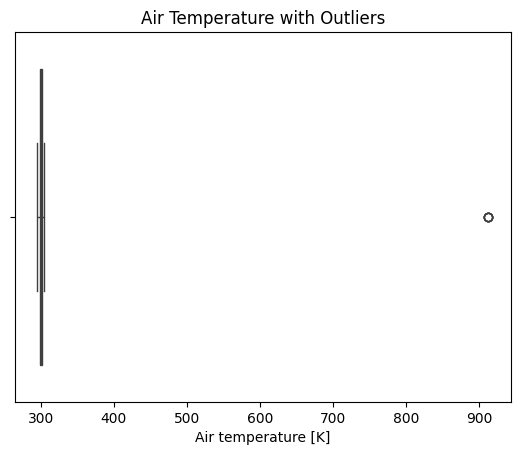

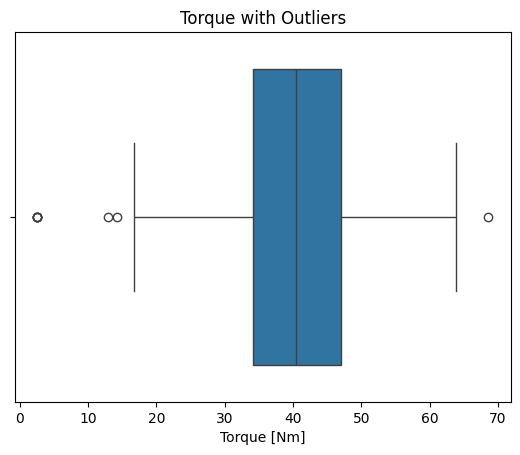

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_sample['Air temperature [K]'])
plt.title("Air Temperature with Outliers")
plt.show()

sns.boxplot(x=df_sample['Torque [Nm]'])
plt.title("Torque with Outliers")
plt.show()


In [17]:
print(df_sample['Type'].unique())


['L' 'M' 'H' 'L ' '??' 'h' 'm' 'HIGH']


In [18]:
df_sample['Type'].value_counts()

Type
L       320
M       133
H        42
L         1
??        1
h         1
m         1
HIGH      1
Name: count, dtype: int64

In [13]:
print(df['Machine failure'].value_counts(normalize=True))

Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64
